In [1]:
import pandas as pd
import os
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier

C:\Users\SSN\AppData\Local\Temp\ipykernel_7212\621561911.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


LOADING THE DATASET :

In [2]:
df = pd.read_csv("online_shoppers_intention.csv")
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


PREPROCESSING :

In [3]:
# Null Values : 

print(df.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [4]:
df['Month'] = df['Month'].map({'Feb':0, 'Mar':1, 'May':2, 'Oct':3, 'June':4, 'Jul':5, 'Aug':6, 'Nov':7, 'Sep':8, 'Dec':9})
df['VisitorType'] = df['VisitorType'].map({'Returning_Visitor':0, 'New_Visitor':1, 'Other':2})
df['Weekend'] = df['Weekend'].map({False:0, True:1})
df['Revenue'] = df['Revenue'].map({False:0, True:1})

In [5]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,0,1,1,1,1,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,0,2,2,1,2,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,0,4,1,9,3,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,0,3,2,2,4,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,0,3,3,1,4,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,9,4,6,1,1,0,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,7,3,2,1,8,0,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,7,3,2,1,13,0,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,7,2,2,3,11,0,0,0


In [6]:
numeric_cols = ['Administrative', 'Administrative_Duration',	'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',	'BounceRates', 'ExitRates',	'PageValues', 'SpecialDay']
scaler_minmax = MinMaxScaler()
df[numeric_cols] = scaler_minmax.fit_transform(df[numeric_cols])

In [7]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.000000,0.000000,0.0,0.0,0.001418,0.000000,1.000000,1.000000,0.000000,0.0,0,1,1,1,1,0,0,0
1,0.000000,0.000000,0.0,0.0,0.002837,0.001000,0.000000,0.500000,0.000000,0.0,0,2,2,1,2,0,0,0
2,0.000000,0.000000,0.0,0.0,0.001418,0.000000,1.000000,1.000000,0.000000,0.0,0,4,1,9,3,0,0,0
3,0.000000,0.000000,0.0,0.0,0.002837,0.000042,0.250000,0.700000,0.000000,0.0,0,3,2,2,4,0,0,0
4,0.000000,0.000000,0.0,0.0,0.014184,0.009809,0.100000,0.250000,0.000000,0.0,0,3,3,1,4,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.111111,0.042663,0.0,0.0,0.075177,0.027883,0.035714,0.145153,0.033839,0.0,9,4,6,1,1,0,1,0
12326,0.000000,0.000000,0.0,0.0,0.007092,0.007280,0.000000,0.106667,0.000000,0.0,7,3,2,1,8,0,1,0
12327,0.000000,0.000000,0.0,0.0,0.008511,0.002880,0.416667,0.433333,0.000000,0.0,7,3,2,1,13,0,1,0
12328,0.148148,0.022067,0.0,0.0,0.021277,0.005408,0.000000,0.105263,0.000000,0.0,7,2,2,3,11,0,0,0


In [8]:
scaler_standard = StandardScaler()
df[numeric_cols] = scaler_standard.fit_transform(df[numeric_cols])

In [9]:
df.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                  int64
Weekend                      int64
Revenue                      int64
dtype: object

EXPLORATORY DATA ANALYSIS :

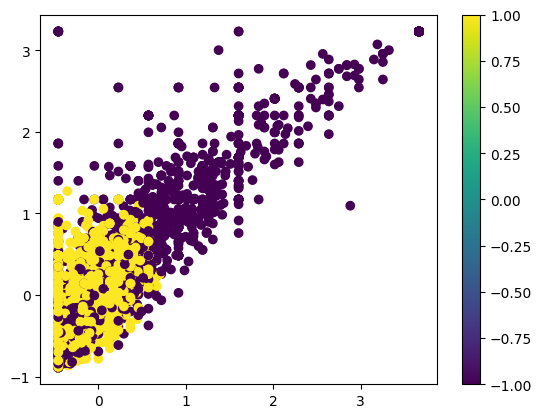

In [10]:
outlier_detector = IsolationForest(contamination=0.5)
df['Outlier'] = outlier_detector.fit_predict(df[numeric_cols])
plt.scatter(df['BounceRates'], df['ExitRates'], c=df['Outlier'], cmap='viridis')
plt.colorbar()
plt.show()

df = df[df['Outlier'] == 1].drop('Outlier', axis=1)

kNN MODEL WITHOUT FEATURE REDUCTION :

In [11]:
X = df.drop("Revenue", axis = 1)
Y = df["Revenue"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [12]:
def kNNModelEuclidean(k, x_train, x_test, y_train, y_test):
    neigh = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    neigh.fit(x_train, y_train)
    y_pred = neigh.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    return accuracy

def kNNModelManhattan(k, x_train, x_test, y_train, y_test):
    neigh = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    neigh.fit(x_train, y_train)
    y_pred = neigh.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    return accuracy

def kNNModelMinkowski(k, x_train, x_test, y_train, y_test):
    neigh = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p = 3)
    neigh.fit(x_train, y_train)
    y_pred = neigh.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    return accuracy

In [13]:
print("Without Feature Engineering : \n")
euc_acc = []
man_acc = []
min_acc = []
for k in range(2,20):
    euc_acc.append((k,round(kNNModelEuclidean(k, X_train, X_test, y_train, y_test),3)))
    man_acc.append((k,round(kNNModelManhattan(k, X_train, X_test, y_train, y_test),3)))
    min_acc.append((k,round(kNNModelMinkowski(k, X_train, X_test, y_train, y_test),3)))

print("Euclidean - k = ",max(euc_acc)[0], "Accuracy : ", max(euc_acc))
print("Manhattan - k = ",max(man_acc)[0], "Accuracy : ", max(man_acc))
print("Minkowski - k = ",max(min_acc)[0], "Accuracy : ", max(min_acc))

Without Feature Engineering : 

Euclidean - k =  19 Accuracy :  (19, 0.908)
Manhattan - k =  19 Accuracy :  (19, 0.908)
Minkowski - k =  19 Accuracy :  (19, 0.912)


FEATURE ENGINEERING : 

In [14]:
alpha = 0.01
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train, y_train)
feature_importance = lasso_model.coef_
selected_features = np.where(feature_importance != 0)[0]
X_train_selected_lasso = X_train.iloc[:, selected_features]
X_test_selected_lasso = X_test.iloc[:, selected_features]

In [15]:
print("After Lasso Feature Reduction Technique :\n")

euc_acc = []
man_acc = []
min_acc = []
for k in range(2,20):
    euc_acc.append((k,round(kNNModelEuclidean(k, X_train_selected_lasso, X_test_selected_lasso, y_train, y_test),3)))
    man_acc.append((k,round(kNNModelManhattan(k, X_train_selected_lasso, X_test_selected_lasso, y_train, y_test),3)))
    min_acc.append((k,round(kNNModelMinkowski(k, X_train_selected_lasso, X_test_selected_lasso, y_train, y_test),3)))

print("Euclidean - k = ",max(euc_acc)[0], "Accuracy : ", max(euc_acc)[1])
print("Manhattan - k = ",max(man_acc)[0], "Accuracy : ", max(man_acc)[1])
print("Minkowski - k = ",max(min_acc)[0], "Accuracy : ", max(min_acc)[1])

After Lasso Feature Reduction Technique :

Euclidean - k =  19 Accuracy :  0.927
Manhattan - k =  19 Accuracy :  0.927
Minkowski - k =  19 Accuracy :  0.927


In [16]:
# Ridge Feature Reduction Technique :

alpha = 1.0  
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train, y_train)
feature_importance = ridge_model.coef_
selected_features = feature_importance != 0
X_train_selected_ridge = X_train.loc[:, selected_features]
X_test_selected_ridge = X_test.loc[:, selected_features]

In [17]:
print("After Ridge Feature Reduction Technique :\n")

euc_acc = []
man_acc = []
min_acc = []
for k in range(2,20):
    euc_acc.append((k,round(kNNModelEuclidean(k, X_train_selected_ridge, X_test_selected_ridge, y_train, y_test),3)))
    man_acc.append((k,round(kNNModelManhattan(k, X_train_selected_ridge, X_test_selected_ridge, y_train, y_test),3)))
    min_acc.append((k,round(kNNModelMinkowski(k, X_train_selected_ridge, X_test_selected_ridge, y_train, y_test),3)))

print("Euclidean - k = ",max(euc_acc)[0], "Accuracy : ", max(euc_acc)[1])
print("Manhattan - k = ",max(man_acc)[0], "Accuracy : ", max(man_acc)[1])
print("Minkowski - k = ",max(min_acc)[0], "Accuracy : ", max(min_acc)[1])

After Ridge Feature Reduction Technique :



KeyboardInterrupt: 

In [ ]:
# Backward Feature Elimination :

def backward_elimination(X, y, significance_level=0.05):
    features = X.columns.tolist()
    num_features = len(features)

    for i in range(num_features, 0, -1):
        X_with_constant = sm.add_constant(X)
        model = sm.OLS(y, X_with_constant).fit()
        max_p_value = max(model.pvalues[1:])
        
        if max_p_value > significance_level:
            removed_feature = model.pvalues.idxmax()[:]
            print(f"Removing feature: {removed_feature} (p-value: {max_p_value:.4f})")
            X = X.drop(removed_feature, axis=1)
        else:
            break

    return X

X_train_backward = backward_elimination(X_train, y_train)
X_test_backward = X_test[X_train_backward.columns]

Removing feature: SpecialDay (p-value: 0.9947)
Removing feature: ExitRates (p-value: 0.8451)
Removing feature: Region (p-value: 0.5467)
Removing feature: TrafficType (p-value: 0.4515)
Removing feature: Browser (p-value: 0.3636)
Removing feature: BounceRates (p-value: 0.3242)
Removing feature: ProductRelated (p-value: 0.2971)


In [ ]:
print("After Backward Feature Elimination :\n")

euc_acc = []
man_acc = []
min_acc = []
for k in range(2,20):
    euc_acc.append((k,round(kNNModelEuclidean(k, X_train_backward, X_test_backward, y_train, y_test),3)))
    man_acc.append((k,round(kNNModelManhattan(k, X_train_backward, X_test_backward, y_train, y_test),3)))
    min_acc.append((k,round(kNNModelMinkowski(k, X_train_backward, X_test_backward, y_train, y_test),3)))

print("Euclidean - k = ",max(euc_acc)[0], "Accuracy : ", max(euc_acc)[1])
print("Manhattan - k = ",max(man_acc)[0], "Accuracy : ", max(man_acc)[1])
print("Minkowski - k = ",max(min_acc)[0], "Accuracy : ", max(min_acc)[1])

After Backward Feature Elimination :

Euclidean - k =  19 Accuracy :  0.924
Manhattan - k =  19 Accuracy :  0.915
Minkowski - k =  19 Accuracy :  0.925


kNN Using User Defined Code : 

In [ ]:
def euclidean_distance(x1, x2):
    return math.sqrt(np.sum((x1 - x2)**2))

In [ ]:
def knn_euclidean_distance(k, X_train, y_train, X_test):
    y_pred = []
    for i in range(len(X_test)):
        distances = []
        n=len(X_train)
        for j in range(n):
            dist = euclidean_distance(X_test.iloc[i], X_train.iloc[j])
            distances.append((dist, y_train.iloc[j]))
        distances.sort()
        
        neighbors = distances[:k]
        
        counts = {}
        for neighbor in neighbors:
            label = neighbor[1]
            if label in counts:
                counts[label] += 1
            else:
                counts[label] = 1
        
        max_count = max(counts, key=counts.get)
        y_pred.append(max_count)
    
    return y_pred

In [ ]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Split data into features (X) and target (y)
X = numeric_df.drop('Revenue', axis=1)
y = numeric_df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
for i in range(len(X_train)):
    print(X_train.iloc[i].values)





k_nearest_indices = np.argsort(distances)[:k]
        k_nearest_labels = [y_train[i] for i in k_nearest_indices]
        most_common_label = Counter(k_nearest_labels).most_common(1)[0][0]
        y_pred.append(most_common_label)

[-0.69699296 -0.4571914  -0.3964779  -0.24493051 -0.48863639 -0.53550934
  0.36729136  1.1714725  -0.31717784 -0.30882137  2.          2.
  2.          6.          3.          0.          0.        ]
[-0.69699296 -0.4571914  -0.3964779  -0.24493051 -0.60106238 -0.55954791
 -0.457683    0.34833526 -0.31717784 -0.30882137  7.          1.
  1.          3.         11.          0.          0.        ]
[-0.69699296 -0.4571914  -0.3964779  -0.24493051 -0.55609199 -0.36567165
 -0.457683   -0.69038553 -0.31717784 -0.30882137  1.          4.
  1.          3.          2.          0.          0.        ]
[-0.69699296 -0.4571914  -0.3964779  -0.24493051 -0.35372519 -0.1156183
  0.05792598  0.05680748 -0.31717784 -0.30882137  2.          2.
  2.          1.          1.          0.          0.        ]
[ 0.20617279 -0.11305684 -0.3964779  -0.24493051 -0.30875479 -0.16205802
 -0.02348596 -0.03976672 -0.31717784 -0.30882137  1.          2.
  2.          3.         10.          0.          0.        ]
[

In [ ]:
from collections import Counter

def euclidean_distance(x1, x2):
    x1 = np.array(x1)
    x2 = np.array(x2)
    return np.sqrt(np.sum((x1 - x2) ** 2))

def knn_predict(k, X_train, y_train, X_test):
    y_pred = []
    distances=[]
    for i in range(len(X_test)):
        for j in range(len(X_train)):
            temp=euclidean_distance(X_test.iloc[i].values,X_train.iloc[j].values)
            distances.append(temp)
        
    print(distances)


ROC CURVE FOR TRAINING AND TESTING ERROR :